In [125]:
import json

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter

In [126]:
plt.rcParams.update({'font.size': 16})

In [127]:
FILE = 'data/output/report.csv'

COLOUR_MAP = {
    'Green': 'green',
    'Amber': 'orange',
    'Red': 'red',
}

AMBER_THRESHOLD = 0.8

In [128]:
def get_colour(value: float) -> str:
    if value < AMBER_THRESHOLD:
        return 'red'
    elif value < 1:
        return 'orange'
    else:
        return 'green'

In [129]:
df = pd.read_csv(FILE, index_col=['site_id', 'sensor_id', 'measure'])
df['RAG'] = df['RAG'].astype('category')
assert not df.index.duplicated().any(), 'Duplicated index values'
df['colour'] = df['RAG'].map(COLOUR_MAP)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 112 entries, ('S0015', 2003150, 'AQ_NO') to ('S0051', 2000150, 'MET_TEMP')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   uptime  112 non-null    float64 
 1   RAG     112 non-null    category
 2   colour  112 non-null    category
dtypes: category(2), float64(1)
memory usage: 2.1+ KB


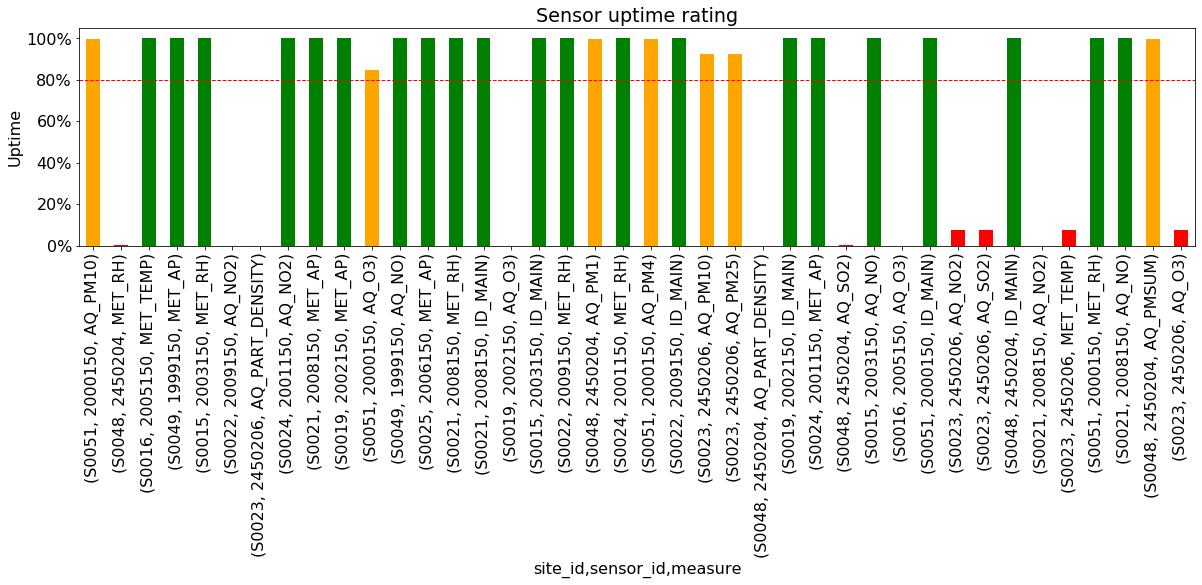

In [130]:
_df = df.sample(40)
ax = _df['uptime'].plot.bar(color=_df['colour'], figsize=(20, 4))

# Labels
ax.set_title('Sensor uptime rating')
ax.set_ylabel('Uptime')
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
ax.axhline(AMBER_THRESHOLD, c='r', ls='--', lw=1)

(0, 1)

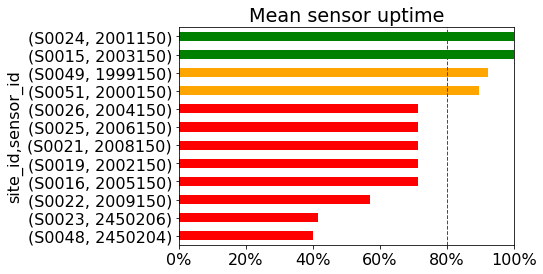

In [131]:
s = df.groupby(['site_id', 'sensor_id'])['uptime'].mean()
s = s.sort_values()
ax = s.plot.barh(color=s.map(get_colour))
ax.set_title('Mean sensor uptime')
ax.xaxis.set_major_formatter(PercentFormatter(1, 0))
ax.axvline(AMBER_THRESHOLD, c='r', ls='--', lw=1)
ax.set_xlim(0, 1)

(0, 1)

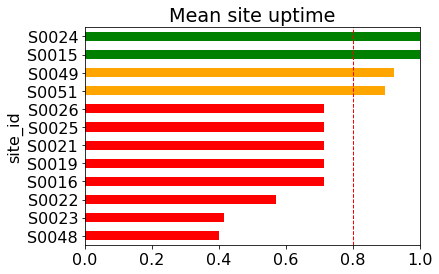

In [132]:
s = df.groupby(['site_id'])['uptime'].mean()
s = s.sort_values()
ax = s.plot.barh(color=s.map(get_colour))
ax.set_title('Mean site uptime')
ax.axvline(AMBER_THRESHOLD, c='r', ls='--', lw=1)
ax.set_xlim(0, 1)

Get site meta-data

In [133]:
with open('AMfixed.json') as file:
    meta = json.load(file)

sites = meta['sites']

Get position of each site

Aggregate data by site

In [135]:
site_uptime = df.groupby('site_id')['uptime'].mean().to_frame()
site_uptime['latitude'] = site_uptime.index.map(lambda s: sites[s]['sla'])
site_uptime['longitude'] = site_uptime.index.map(lambda s: sites[s]['slo'])
site_uptime['colour'] = site_uptime['uptime'].map(get_colour)

Geo-plot

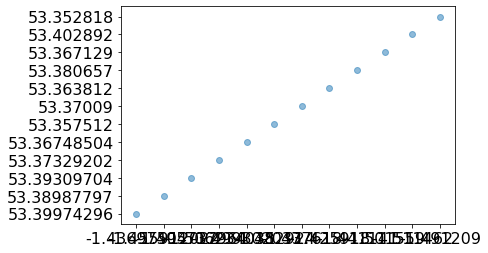

In [140]:
fig, ax = plt.subplots()
ax.scatter(
    x=site_uptime['longitude'],
    y=site_uptime['latitude'],
    #s=(1/site_uptime['uptime']) * 100,
    #c=site_uptime['colour'],
    alpha=0.5,
)

In [148]:
for rag, _df in df[~df['RAG'].eq('Green')].groupby('RAG'):
    if _df.empty:
        continue
    print(rag)
    print(_df['uptime'].sort_values().map('{:,.0%}'.format))

Amber
site_id  sensor_id  measure 
S0051    2000150    AQ_O3        85%
S0023    2450206    AQ_PM1       92%
                    AQ_PM10      92%
                    AQ_PM25      92%
                    AQ_PM4       92%
                    AQ_PMSUM     92%
S0048    2450204    AQ_PM1      100%
                    AQ_PM10     100%
                    AQ_PM25     100%
                    AQ_PM4      100%
                    AQ_PMSUM    100%
S0051    2000150    AQ_PM1      100%
                    AQ_PM10     100%
                    AQ_PM25     100%
                    AQ_PM4      100%
                    AQ_PMSUM    100%
Name: uptime, dtype: object
Red
site_id  sensor_id  measure        
S0016    2005150    AQ_NO2              0%
S0049    1999150    AQ_PART_DENSITY     0%
S0048    2450204    AQ_PART_DENSITY     0%
S0026    2004150    AQ_O3               0%
                    AQ_NO2              0%
S0025    2006150    AQ_O3               0%
                    AQ_NO2              0%
S002